In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
DATA_PATH = 'data/bank-full.csv'

In [3]:
df = pd.read_table(DATA_PATH, sep=',')

df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# <INS> UNIVARIATE ANALYSIS

### Y (target)

In [7]:
df.y.value_counts().reset_index()

,y,count
0,no,39922
1,yes,5289


In [8]:
df.y.value_counts(normalize=True).round(2).reset_index()

,y,proportion
0,no,0.88
1,yes,0.12


### Age

In [9]:
ages = df.age.sort_values().unique()
bins = np.arange(start=0, stop=ages.max() + 1, step=5)

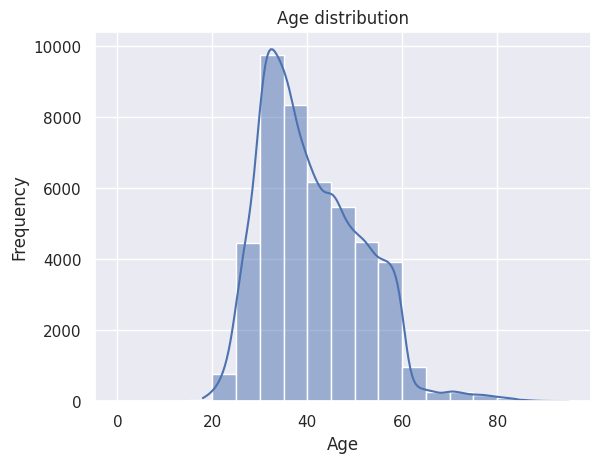

In [10]:
sns.set_theme()
sns.histplot(x='age', data=df, bins=bins, kde=True)

plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

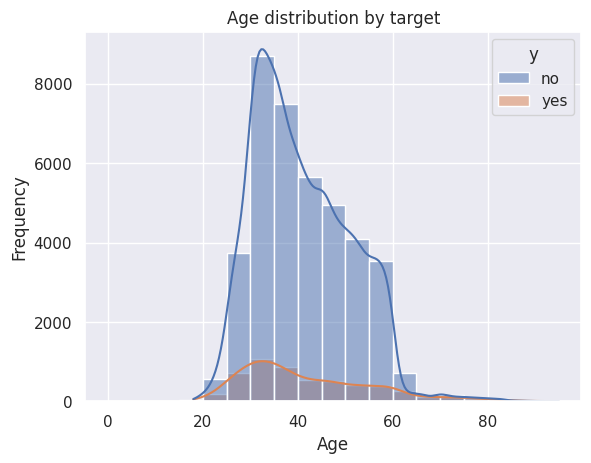

In [11]:
sns.set_theme()
sns.histplot(x='age', hue='y', data=df, bins=bins, kde=True)

plt.title('Age distribution by target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
# The age distribution in the "no" target group reflects the general population age distribution
# Whereas, in the "yes" target group, the age distribution is more even distributed. In other words,
# there's a higher proportion of older people. This may suggest a higher propensity for older people
# to subscribe for a bank deposit.

### Marital

In [13]:
df.marital.value_counts(normalize=True).reset_index().round(2)

,marital,proportion
0,married,0.60
1,single,0.28
2,divorced,0.12


In [14]:
percentages_df = df.groupby('marital')['y'].value_counts(normalize=True).rename('perc').reset_index().round(2)
percentages_df

,marital,y,perc
0,divorced,no,0.88
1,divorced,yes,0.12
2,married,no,0.90
3,married,yes,0.10
4,single,no,0.85
5,single,yes,0.15


In [15]:
percentages_pivot_df = percentages_df.pivot(index='marital', columns='y', values='perc')
percentages_pivot_df

y,no,yes
marital,,
divorced,0.88,0.12
married,0.90,0.10
single,0.85,0.15


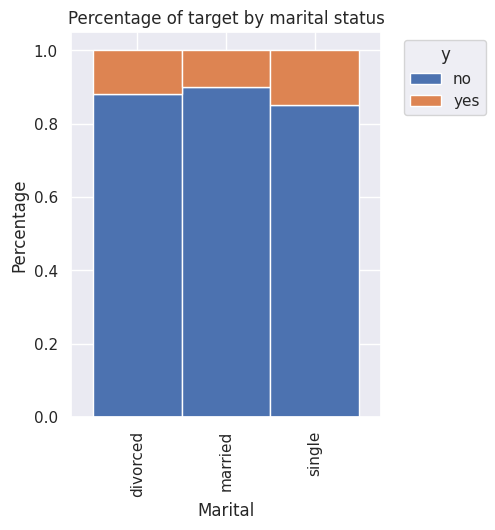

In [16]:
percentages_pivot_df.plot(kind='bar', stacked=True, figsize=(4, 5), width=1)

plt.title('Percentage of target by marital status')
plt.xlabel('Marital')
plt.ylabel('Percentage')
plt.legend(title='y', bbox_to_anchor=(1.05, 1))
plt.show()

In [17]:
# 15% of single people subscribe for a deposit VS 10% of married people.

In [18]:
## Alternative
# counts = pd.crosstab(df.marital, df.y)
# sums = counts.sum(axis=1)
# percentages_df = counts.div(sums, axis=0)
# percentages_df.plot(kind='bar', stacked=True)

In [19]:
percentages_df = df.groupby('y')['marital'].value_counts(normalize=True).rename('perc').reset_index().round(2)
percentages_df

,y,marital,perc
0,no,married,0.61
1,no,single,0.27
2,no,divorced,0.11
3,yes,married,0.52
4,yes,single,0.36
5,yes,divorced,0.12


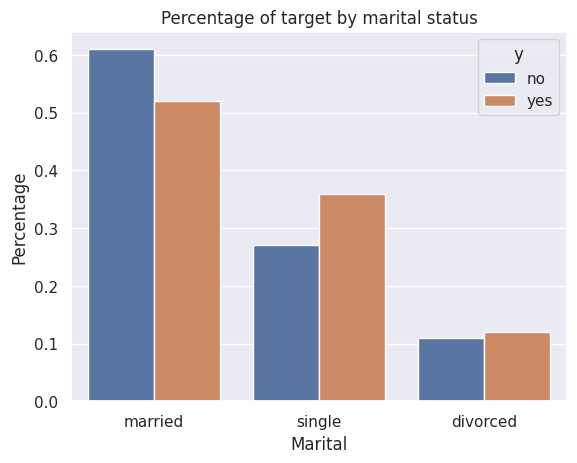

In [20]:
sns.barplot(x='marital', y='perc', hue='y', data=percentages_df)

plt.title('Percentage of target by marital status')
plt.xlabel('Marital')
plt.ylabel('Percentage')
plt.legend(title='y')
plt.show()

In [21]:
# Between the people who didn't subscribe for a deposit, 61% are married and 27% are single.
# Between the people that subscribed for a deposit the percentage of single people was higher (36%) 
# and the percentage of married people lower (52%).

### Education

In [22]:
edu_df = df.groupby('y')['education'].value_counts(normalize=True).rename('perc').reset_index().round(2)

# Sort for plot
edu_df['education'] = pd.Categorical(edu_df['education'], categories=['primary', 'secondary', 'tertiary', 'unknown'], ordered=True)
edu_df.sort_values(['y', 'education'], inplace=True)

edu_df

,y,education,perc
2,no,primary,0.16
0,no,secondary,0.52
1,no,tertiary,0.28
3,no,unknown,0.04
6,yes,primary,0.11
4,yes,secondary,0.46
5,yes,tertiary,0.38
7,yes,unknown,0.05


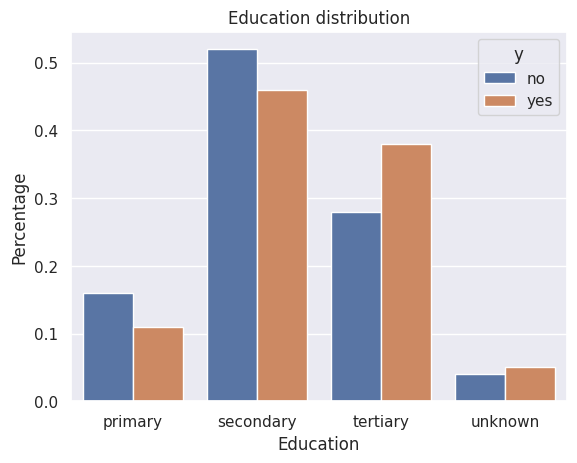

In [23]:
sns.barplot(x='education', y='perc', hue='y', data=edu_df)

plt.title('Education distribution')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show()

In [24]:
# Higher frequency of 'yes' is in the group with tertiary education. In other words, people with 
# higher education seem to be more inclined to subscribe for a bank deposit.

### Job

In [25]:
job_df = df.groupby('y')['job'].value_counts(normalize=True).round(2).rename('perc').reset_index()
order = ['housemaid', 'blue-collar', 'services', 'technician', 'admin.', 'management', 'self-employed', 'entrepreneur', 'retired', 'student', 'unemployed', 'unknown']
job_df['job'] = pd.Categorical(job_df['job'], categories=order, ordered=True)
job_df.sort_values(['y', 'job'], inplace=True)

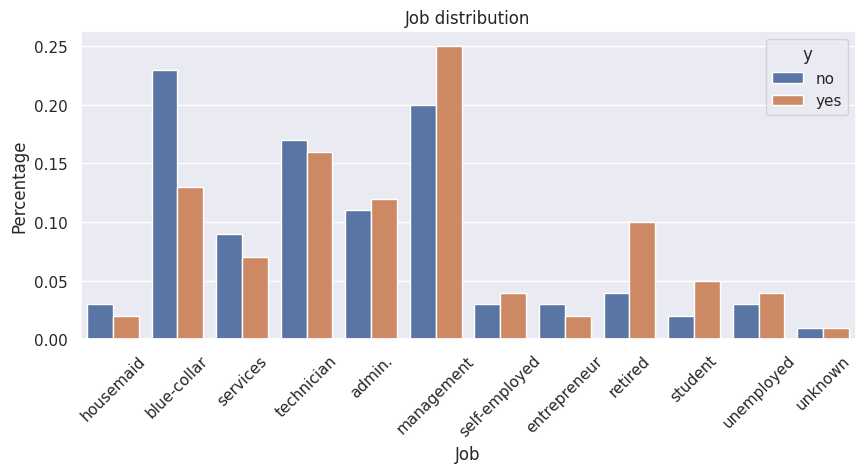

In [26]:
plt.figure(figsize=(10, 4))
sns.barplot(x='job', y='perc', hue='y', data=job_df)

plt.title('Job distribution')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Target distributes differently is different jobs. For low-qualified jobs there's an higher frequency of "no", while 
# on higher-qualified jobs there's an higher frequency of "yes". 
# High "yes" frequency can be noted also for the "student" and "retired" classes.

In [28]:
# Education distribution per job
job_df = df[(df.education != 'unknown') & (df.job != 'unknown')]
job_df = job_df.groupby('job')['education'].value_counts(normalize=True).rename('perc').reset_index()

job_df['education'] = pd.Categorical(job_df['education'], categories=['primary', 'secondary', 'tertiary'], ordered=True)
job_order = ['housemaid', 'blue-collar', 'services', 'technician', 'admin.', 'management', 'self-employed', 'entrepreneur', 'retired', 'student', 'unemployed']
job_df['job'] = pd.Categorical(job_df['job'], categories=job_order, ordered=True)

job_df.sort_values(['job', 'education'], inplace=True)

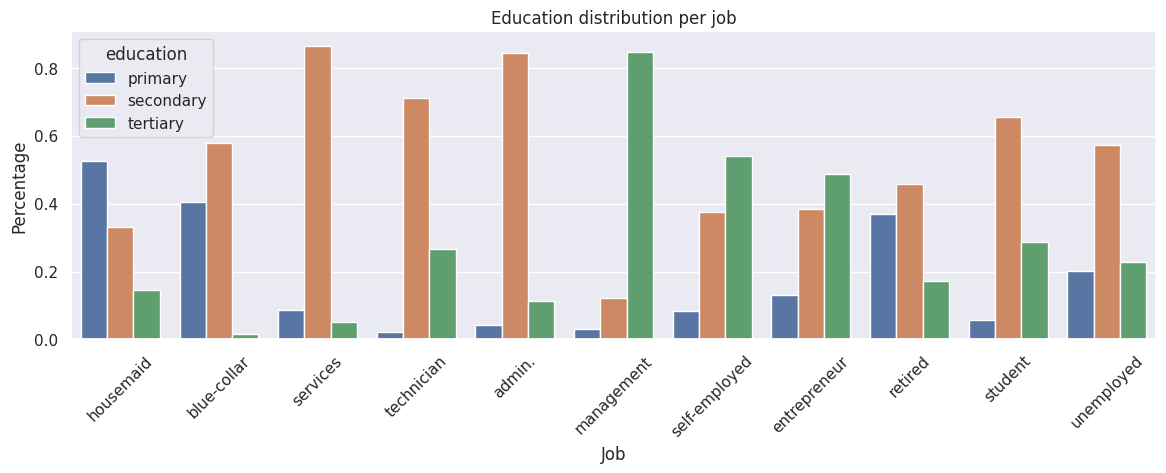

In [29]:
plt.figure(figsize=(14, 4))
sns.barplot(x='job', y='perc', hue='education', data=job_df)
plt.title('Education distribution per job')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Same thing via crosstabulation
crosstab = pd.crosstab(df['job'], df['education'])
job_sums = crosstab.sum(axis=1)
crosstab.div(job_sums, axis=0).round(2)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,0.04,0.82,0.11,0.03
blue-collar,0.39,0.55,0.02,0.05
entrepreneur,0.12,0.36,0.46,0.05
housemaid,0.51,0.32,0.14,0.04
management,0.03,0.12,0.82,0.03
retired,0.35,0.43,0.16,0.05
self-employed,0.08,0.37,0.53,0.02
services,0.08,0.83,0.05,0.04
student,0.05,0.54,0.24,0.17


### Balance

In [31]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [32]:
# Some balances are negative. Check proportion.
positive_balance = (df.balance > 0).value_counts()

print(f'''n positive: {positive_balance[True]}
n negative: {positive_balance[False]}
% positive: {positive_balance[True]/(positive_balance[True] + positive_balance[False])}''')


n positive: 37931
n negative: 7280
% positive: 0.8389772400521996


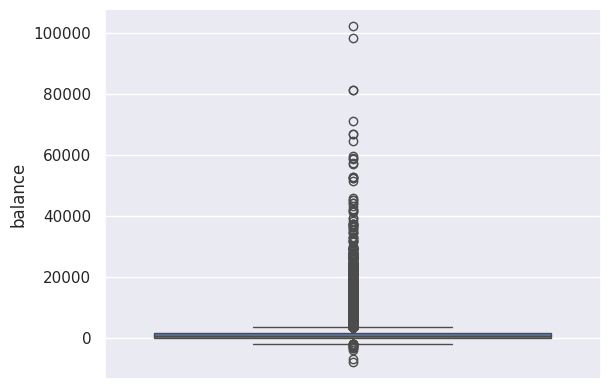

In [33]:
sns.boxplot(y=df.balance)
plt.show()

-172.0 5768.0


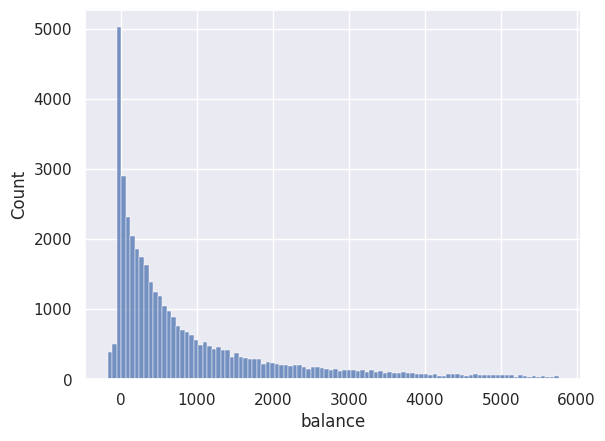

In [34]:
# Just the 90% central data
lower_percentile = np.percentile(df.balance, 5)
higher_percentile = np.percentile(df.balance, 95)
print(lower_percentile, higher_percentile)

balance90_df = df[(df.balance > lower_percentile) & (df.balance < higher_percentile)].reset_index()

sns.histplot(x=balance90_df.balance, bins=100)
plt.show()

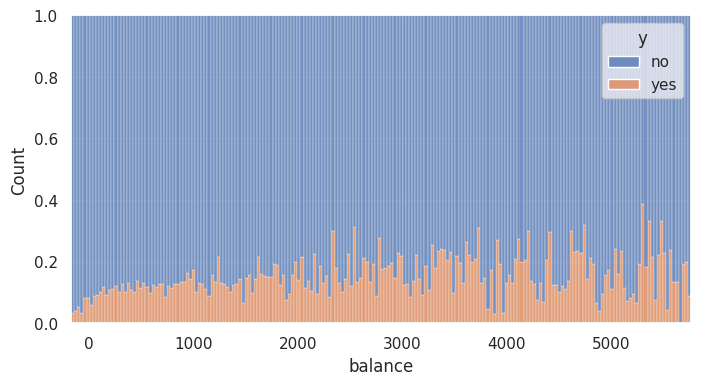

In [35]:
# Target distribution
plt.figure(figsize=(8, 4))
sns.histplot(x='balance', hue='y', bins=200, multiple='fill', data=balance90_df)

plt.show()

In [36]:
# Higher the balance, the proportion of "yes" increases, despite oscillations.

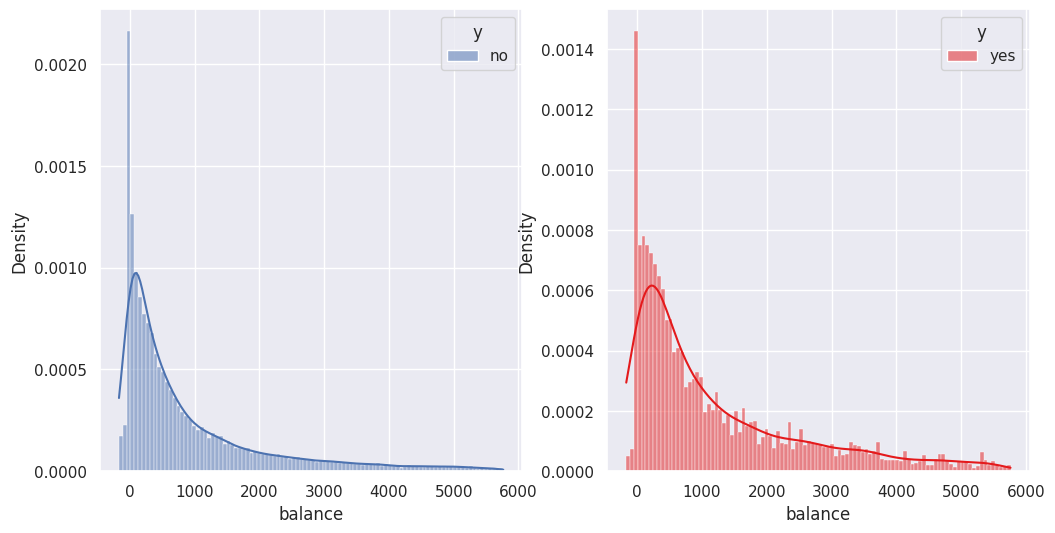

In [37]:
# Alternative
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(x='balance', hue='y', bins=100, stat='density', kde='True', data=balance90_df[balance90_df.y == 'no'], ax=axes[0])
sns.histplot(x='balance', hue='y', bins=100, stat='density', kde='True', palette='Set1', data=balance90_df[balance90_df.y == 'yes'], ax=axes[1])
plt.show()

In [38]:
# In the "yes" group, the balances are a bit more evenly distributed then in the "no" group. 
# That is, in the "yes" group the proportion of people with higher balances is higher.

### Default

In [39]:
df.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [40]:
df.groupby('default')['y'].value_counts(normalize=True).round(2).reset_index()

,default,y,proportion
0,no,no,0.88
1,no,yes,0.12
2,yes,no,0.94
3,yes,yes,0.06


In [41]:
# The number of people who default is very low. Within the "yes" subgroup, the frequency is half compared of the "no" subgroup. 
# That is, people in default are less likely to subscribe for a bank deposit.

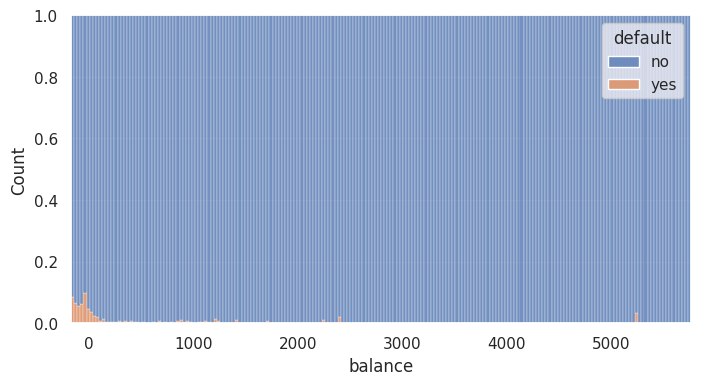

In [42]:
plt.figure(figsize=(8, 4))
sns.histplot(x='balance', hue='default', bins=200, multiple='fill', data=balance90_df)
plt.show()

In [43]:
# The people that made default are on lowest balance group.

### Housing

In [44]:
df.groupby('housing')['y'].value_counts(normalize=True).round(2).reset_index()

,housing,y,proportion
0,no,no,0.83
1,no,yes,0.17
2,yes,no,0.92
3,yes,yes,0.08


In [45]:
# People with a housing loan are less likely to subscribe for a bank deposit.

### Loan

In [46]:
df.groupby('loan')['y'].value_counts(normalize=True).round(2).reset_index()

,loan,y,proportion
0,no,no,0.87
1,no,yes,0.13
2,yes,no,0.93
3,yes,yes,0.07


In [47]:
# People with a personal loan are less likely to subscribe for a bank deposit.

### Contact

In [48]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [49]:
contact_df = df[df.contact != 'unknown'].reset_index()

In [50]:
contact_df.groupby('contact')['y'].value_counts(normalize=True).round(2).reset_index().pivot(index='contact', columns='y')

proportion      
y                 no   yes
contact                   
cellular        0.85  0.15
telephone       0.87  0.13

In [51]:
contact_df.groupby('y')['contact'].value_counts(normalize=True).round(2).reset_index().pivot(index='y', columns='contact')

proportion          
contact   cellular telephone
y                           
no            0.91      0.09
yes           0.92      0.08

In [52]:
# Same contact distribution for both the target groups. The feature seems to be unimportant.

### Day, Month

In [53]:
day_df = df.day.value_counts(normalize=True).round(2).reset_index().sort_values('day').reset_index(drop=True)

In [54]:
day_df['day'] = day_df['day'].astype(str)

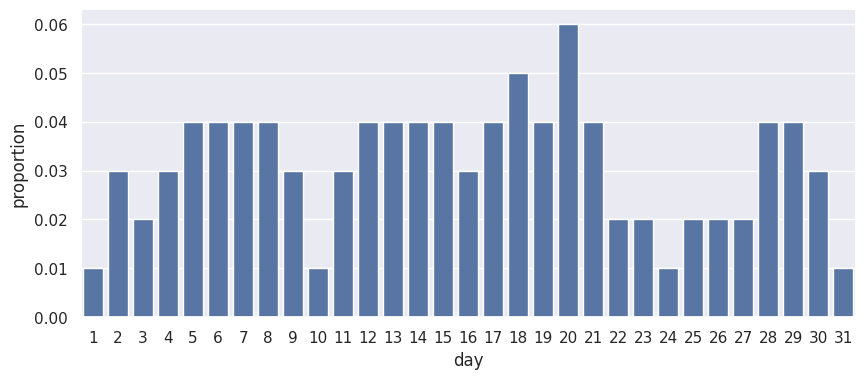

In [55]:
plt.figure(figsize=(10, 4))
sns.barplot(x='day', y='proportion', data=day_df)
plt.show()

In [56]:
day2_df = df.groupby('day')['y'].value_counts(normalize=True).round(2).reset_index()

day2_df

,day,y,proportion
0,1,no,0.72
1,1,yes,0.28
2,2,no,0.86
3,2,yes,0.14
4,3,no,0.84
...,...,...,...
57,29,yes,0.07
58,30,no,0.83
59,30,yes,0.17
60,31,no,0.93


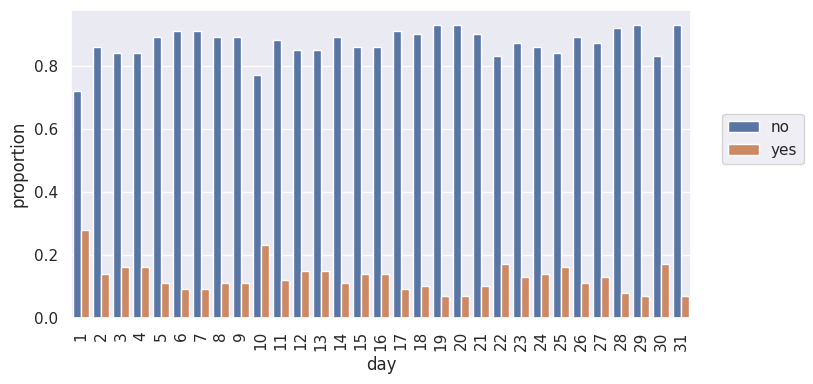

In [57]:
plt.figure(figsize=(8, 4))
sns.barplot(x='day', y='proportion', hue='y', data=day2_df)
plt.xticks(rotation=90)
plt.legend(loc=(1.05, 0.5))
plt.show()

In [58]:
# A certain ondulating pattern maybe?

In [59]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

In [60]:
df.month.value_counts().reset_index()

,month,count
0,may,13766
1,jul,6895
2,aug,6247
3,jun,5341
4,nov,3970
5,apr,2932
6,feb,2649
7,jan,1403
8,oct,738
9,sep,579


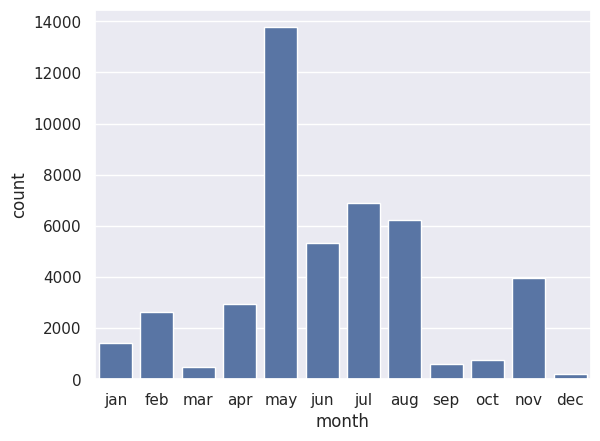

In [61]:
sns.barplot(x='month', y='count', data=df.month.value_counts().reset_index())
plt.show()

In [62]:
month_df = df.groupby('month', observed=False)['y'].value_counts(normalize=True).round(2).reset_index()

In [63]:
month_df.pivot(index='month', columns='y', values='proportion')

y,no,yes
month,,
jan,0.90,0.10
feb,0.83,0.17
mar,0.48,0.52
apr,0.80,0.20
may,0.93,0.07
jun,0.90,0.10
jul,0.91,0.09
aug,0.89,0.11
sep,0.54,0.46


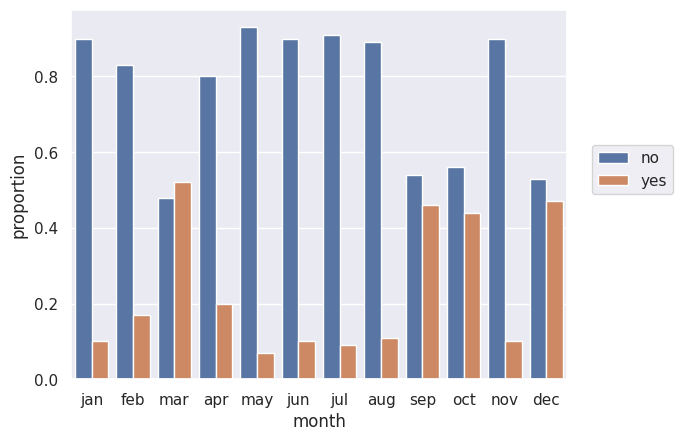

In [64]:
sns.barplot(x='month', y='proportion', hue='y', data=month_df)
plt.legend(loc=(1.05, 0.5))
plt.show()

In [65]:
# It seems that in the months with the overall lowest number of calls (mar, sept, oct, dec), 
# the proportion of people answering "yes" is the highest. May be due to a better call quality 
# on the part of the operator, who may allocate more time per customer in these periods with lower workload.

<Axes: xlabel='month', ylabel='Count'>

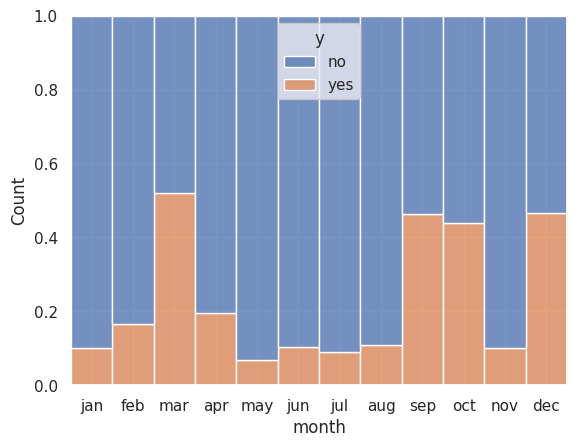

In [66]:
sns.histplot(x='month', hue='y', multiple='fill', data=df)

### Duration

In [67]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

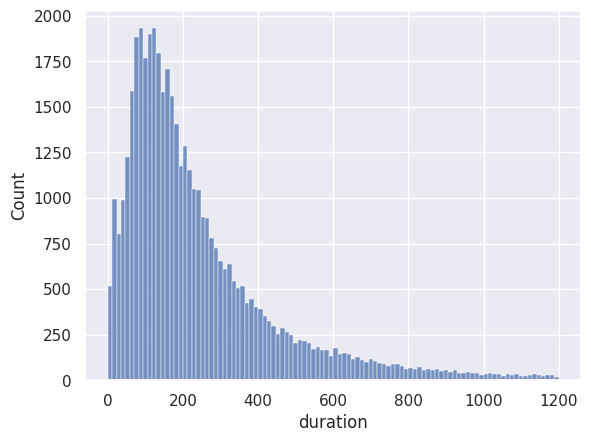

In [68]:
sns.histplot(x='duration', binrange=(0, 1200), data=df)
plt.show()

In [69]:
duration1200_df = df[df.duration < 1200] 

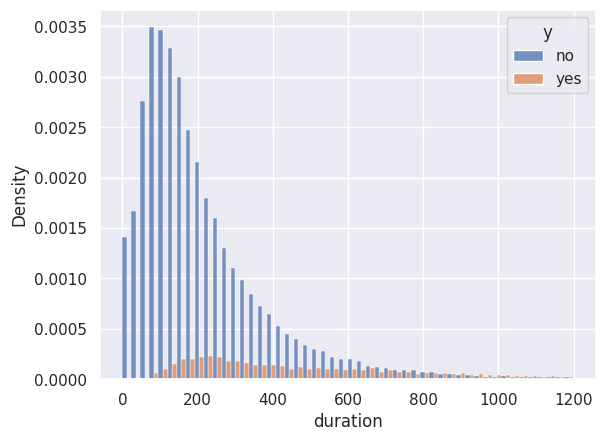

In [70]:
sns.histplot(x='duration', hue='y', stat='density', bins=50, multiple='dodge', data=duration1200_df)
plt.show()

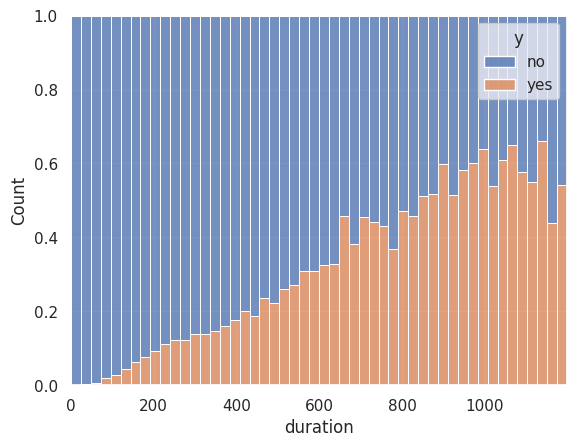

In [71]:
sns.histplot(x='duration', hue='y', bins=50, multiple='fill', data=duration1200_df)
plt.show()

In [72]:
# The feature is highly correlated with the target: the proportion of "yes" increases steadily with the contact duration. 
# The duration is known after the call is made, so it cannot be used to decide whether to contact a customer or not. 
# The correlation may suggest that the longer the operator keeps the customer on the phone, the higher the probability they would say "yes". 
# However, it also may be the case the call gets longer after the customer says "yes", to arrange the thing.

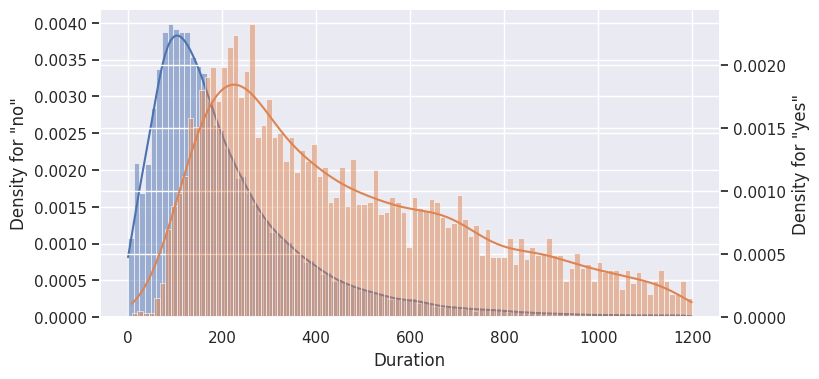

In [73]:
# Alternative
fig, ax1 = plt.subplots(figsize=(8, 4))

sns.histplot(x='duration', data=duration1200_df[duration1200_df.y == 'no'], bins=100, stat='density', kde=True, ax=ax1)
ax1.set_xlabel('Duration')
ax1.set_ylabel('Density for "no"')

ax2 = ax1.twinx()
sns.histplot(x='duration', data=duration1200_df[duration1200_df.y == 'yes'], bins=100, stat='density', kde=True, color=sns.color_palette()[1], ax=ax2)
ax2.set_ylabel('Density for "yes"')

plt.show()

### Campaign

In [74]:
df.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [75]:
df.groupby('y')['campaign'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


In [76]:
# Check how many 0 and 1 campaigns
(df.campaign == 0).sum(), (df.campaign == 1).sum()

(0, 17544)

In [77]:
# All customers have been contacted at least one time (makes sense, since they are in the dataset...)

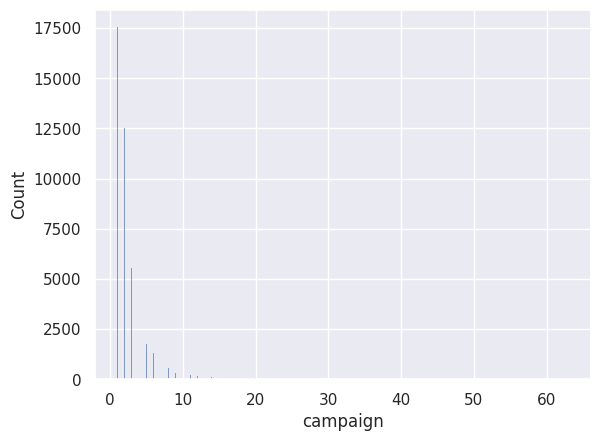

In [78]:
sns.histplot(x='campaign', data=df)
plt.show()

In [79]:
df.groupby('y')['campaign'].median()

# Medians even less informative than the means

y
no     2.0
yes    2.0
Name: campaign, dtype: float64

In [80]:
# Bin on the basis of 5 and 95 percentiles
percentiles = np.percentile(df.campaign, 5), np.percentile(df.campaign, 95)
percentiles

(1.0, 8.0)

In [81]:
df['campaign_bin'] = pd.cut(df.campaign, bins=[0, 1, 8, float('inf')], labels=['1', '2-8', '>8'], include_lowest=True)
df['campaign_bin'] = pd.Categorical(df.campaign_bin, categories=['1', '2-8', '>8'], ordered=True)

In [82]:
campaign_df = df.groupby('campaign_bin', observed=False)['y'].value_counts(normalize=True).reset_index()

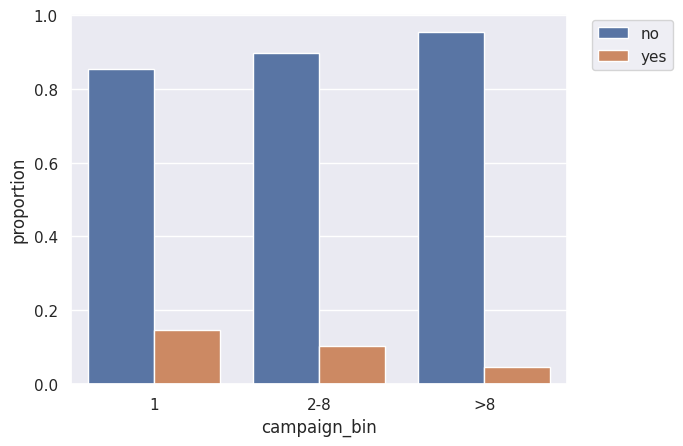

In [83]:
sns.barplot(x='campaign_bin', y='proportion', hue='y', data=campaign_df)
plt.legend(loc=(1.05, 0.85))
plt.show()

In [84]:
campaign_pivot_df = campaign_df.pivot(index='campaign_bin', columns='y', values='proportion').round(2)
campaign_pivot_df

y,no,yes
campaign_bin,,
1,0.85,0.15
2-8,0.90,0.10
>8,0.95,0.05


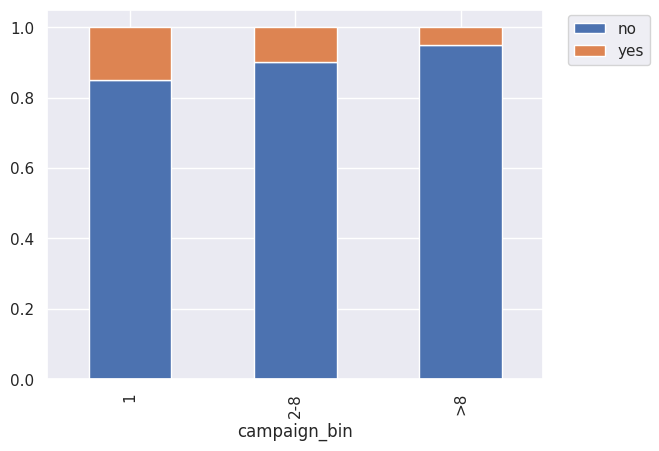

In [85]:
campaign_pivot_df.plot(kind='bar', stacked=True)
plt.legend(loc=(1.05, 0.85))
plt.show()

In [86]:
# Customers contacted multiple times in this campaign are less likely to say "yes".
# But whats does exactly mean "number of contacts performed during this campaign and for this client"?
# Was the client contacted N times to talk to him every time about the bank deposit offer?
# What were his answers to these multiple contact events? Should we consider his "y" as the final
# answer after a series of "no" for the contact events happened before?
# This would be in accordance to what seen above: a client gets contacted multiple times if he
# keeps saying "no" and this would explain why clients with high "campaign" values are correlated with "no".
# Likewise, if a client says "yes", he gets contacted no more, and this would explain why "yes" seems
# to be correlated with lower "campaign" values.
# At the end, the "campaign" features tells us that if a client keeps saying no, then he is less likely to
# subscribe for a bank deposit.
# This feature can be useful to give priority (to be contacted) to client with low "campaign" values.

### Pdays

In [87]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [88]:
(df.pdays == -1).sum()

36954

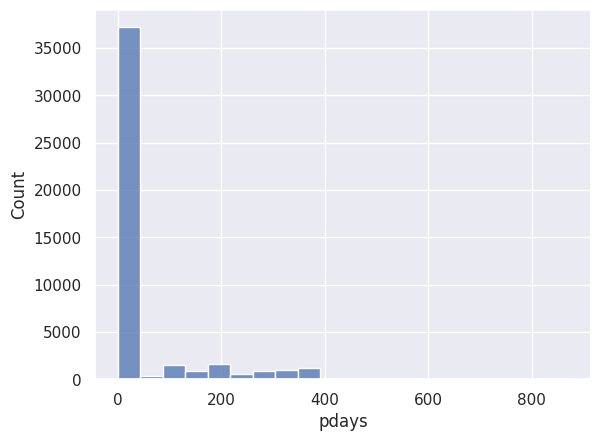

In [89]:
# All data
sns.histplot(x='pdays', bins=20, data=df)
plt.show()

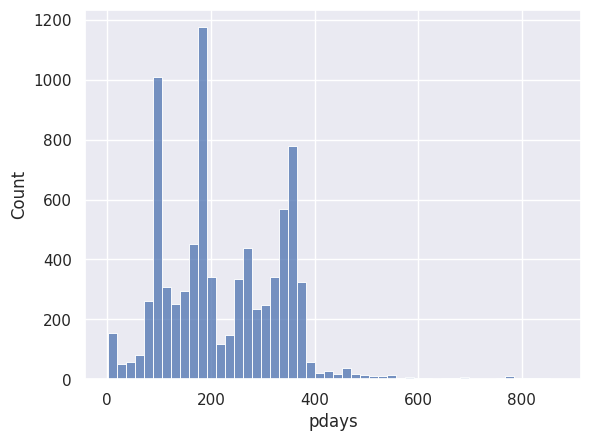

In [90]:
# Only clients contacted at least one time
pdays_df = df[df.pdays > 0]
sns.histplot(x='pdays', bins=50, data=pdays_df)
plt.show()

In [91]:
pdays_df.groupby('y')['pdays'].mean().round()

y
no     234.0
yes    193.0
Name: pdays, dtype: float64

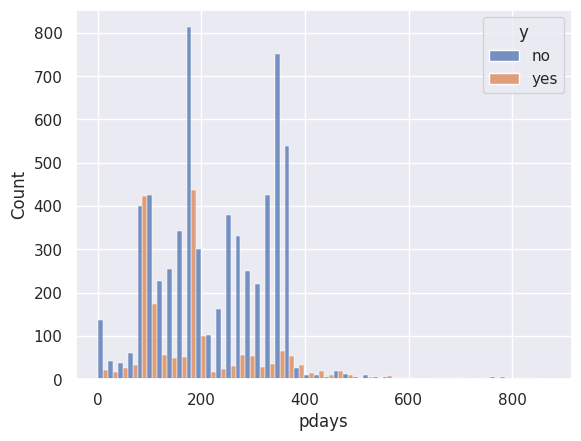

In [92]:
sns.histplot(x='pdays', hue='y', multiple='dodge', data=pdays_df)
plt.show()

In [93]:
# Days passed after last campaign
df['days_passed'] = pd.cut(df.pdays, bins=(float('-inf'), 0, 200, 400, float('inf')), labels=('never_contacted_before', '1-200', '201-400', '400+'), include_lowest=True )

In [94]:
df[['pdays', 'days_passed']][df.pdays == -1]

,pdays,days_passed
0,-1,never_contacted_before
1,-1,never_contacted_before
2,-1,never_contacted_before
3,-1,never_contacted_before
4,-1,never_contacted_before
...,...,...
45203,-1,never_contacted_before
45205,-1,never_contacted_before
45206,-1,never_contacted_before
45207,-1,never_contacted_before


In [95]:
day_passed_df = df.groupby('y')['days_passed'].value_counts(normalize=True).round(2).reset_index()
day_passed_df

,y,days_passed,proportion
0,no,never_contacted_before,0.84
1,no,201-400,0.08
2,no,1-200,0.07
3,no,400+,0.00
4,yes,never_contacted_before,0.64
5,yes,1-200,0.26
6,yes,201-400,0.08
7,yes,400+,0.02


<Axes: xlabel='days_passed', ylabel='proportion'>

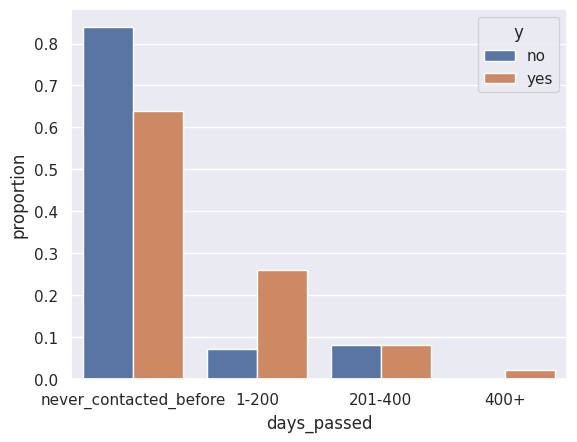

In [96]:
sns.barplot(x='days_passed', y='proportion', hue='y',data=day_passed_df)

In [97]:
# No clear pattern. And since most of the clients have not been contacted before,
# we binarize the feature

In [98]:
df['contacted_before'] = np.where(df.pdays > 0, 'yes', 'no')

In [99]:
pdays_df = df.groupby('y')['contacted_before'].value_counts(normalize=True).round(2).reset_index()
pdays_df

,y,contacted_before,proportion
0,no,no,0.84
1,no,yes,0.16
2,yes,no,0.64
3,yes,yes,0.36


In [100]:
pdays_df.pivot(index='contacted_before', columns='y', values='proportion')

y,no,yes
contacted_before,,
no,0.84,0.64
yes,0.16,0.36


In [101]:
# In the "yes" group there's a higher proportion of people that were contacted before.

### Previous

In [102]:
df.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [103]:
# The number of client contacted before this campaign is low
(df.previous > 0).sum()

8257

In [104]:
# However between them the frequency of "yes" is almost double than the entire dataset.
# Maybe these clients are afecionados
df[df.previous > 0]['y'].value_counts(normalize=True).round(2)

y
no     0.77
yes    0.23
Name: proportion, dtype: float64

In [105]:
prev_df = df[df.previous > 0]

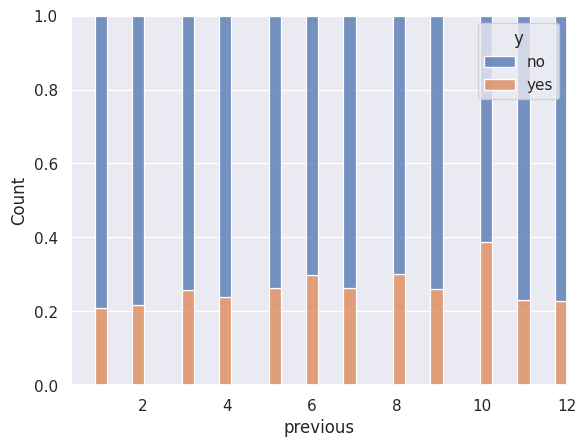

In [106]:
sns.histplot(x='previous', hue='y', multiple='fill', binrange=(0, 12), data=prev_df)
plt.show()

In [107]:
# There may be a correlation between "previous" values and the "yes" target group
# (higher previous values --> higher proportion of "yes")
# If the number of contacts before this campaign can be considered a proxy for custemor fidelity,
# a higher proportion of "yes" can be explained this way.

### Poutcome

In [108]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [109]:
pout_df = df.groupby('poutcome')['y'].value_counts(normalize=True).round(2).reset_index()

pout_df

,poutcome,y,proportion
0,failure,no,0.87
1,failure,yes,0.13
2,other,no,0.83
3,other,yes,0.17
4,success,yes,0.65
5,success,no,0.35
6,unknown,no,0.91
7,unknown,yes,0.09


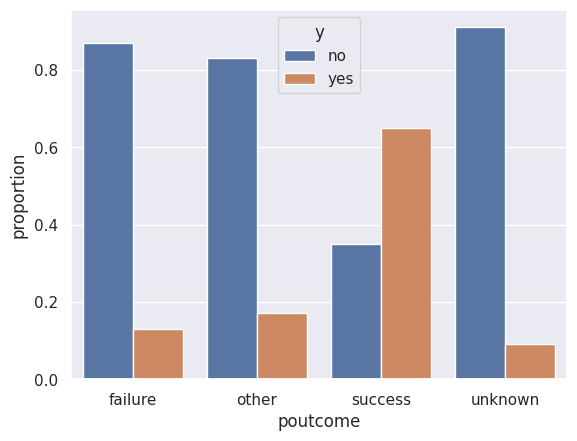

In [110]:
sns.barplot(x='poutcome', y='proportion', hue='y', data=pout_df)
plt.show()

In [111]:
# The outcome of a previous campaign highly correlates with the success of a following campaign (at least in this case).

# <INS> CROSSTABULATION

In [115]:
features = ['job', 'marital']

In [112]:
ct = pd.crosstab(df['job'], df['marital'])
ct 

marital,divorced,married,single
job,,,
admin.,750,2693,1728
blue-collar,750,6968,2014
entrepreneur,179,1070,238
housemaid,184,912,144
management,1111,5400,2947
retired,425,1731,108
self-employed,140,993,446
services,549,2407,1198
student,6,54,878


In [113]:
sums = ct.sum(axis=1)
ct.div(sums, axis=0).round(2)

marital,divorced,married,single
job,,,
admin.,0.15,0.52,0.33
blue-collar,0.08,0.72,0.21
entrepreneur,0.12,0.72,0.16
housemaid,0.15,0.74,0.12
management,0.12,0.57,0.31
retired,0.19,0.76,0.05
self-employed,0.09,0.63,0.28
services,0.13,0.58,0.29
student,0.01,0.06,0.94


In [118]:
# Check crosstab for each pair or features (only one pair here)
for i, col1 in enumerate(features):
    for j, col2 in enumerate(features):
        if i < j:
            crosstab = pd.crosstab(df[col1], df[col2])
            chi_squared_test = scipy.stats.chi2_contingency(crosstab)
            print(10*'===' )
            print(f'{col1} x {col2}\n')
            print(crosstab)
            print()
            print(f'p-value: {chi_squared_test.pvalue}')
            print()

job x marital

marital        divorced  married  single
job                                     
admin.              750     2693    1728
blue-collar         750     6968    2014
entrepreneur        179     1070     238
housemaid           184      912     144
management         1111     5400    2947
retired             425     1731     108
self-employed       140      993     446
services            549     2407    1198
student               6       54     878
technician          925     4052    2620
unemployed          171      731     401
unknown              17      203      68

p-value: 0.0

